<a href="https://colab.research.google.com/github/lvb86/MLPr_GA/blob/main/code/alidacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de Desempenho

#Declarações Globais

In [1]:
pip install -U scikit-learn 

     |████████████████████████████████| 22.3MB 6.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection    import train_test_split,RepeatedStratifiedKFold 
from sklearn.preprocessing      import StandardScaler        #Normalização dos dados
from sklearn.decomposition      import PCA                   #Redução de Dimencionalidade
from sklearn.pipeline           import make_pipeline         #Pipe Line
from sklearn.neural_network     import MLPRegressor
from sklearn.metrics            import mean_absolute_percentage_error

from sklearn.model_selection import GridSearchCV
#from sklearn.svm import SVC
seed = 170696
np.seed = seed

In [18]:
sns.set()
sns.set_style('darkgrid')

In [7]:
urldfCC = 'https://raw.githubusercontent.com/lvb86/MLPr_GA/main/swap/dfConsumoClima2.csv'
df = pd.read_csv(urldfCC)

In [8]:
d = df.iloc[:,2:-3]
d.head()

,Consumo,Ano,Mês,Dias com Precipitação,Precipitação,Pressão,Temperatura,Vento Máx,Vento Méd
0,339480.0,2013,1,9.083333,117.477778,976.542712,22.323023,9.236111,3.053842
1,414663.0,2013,2,13.777778,148.188889,975.360036,22.569606,9.458333,2.835475
2,323379.0,2013,3,13.527778,146.822222,977.684966,19.726666,9.613889,2.849183
3,254855.0,2013,4,11.055556,119.877778,978.880230,18.709059,8.636111,2.475605
4,212174.0,2013,5,15.527778,110.616667,979.065763,15.344357,9.613889,2.375910


Objetivo prever o ano seguinte ... 
como a base é 2013-2019 

treino com 2013- 2017
teste com 2018

In [9]:
X = d.iloc[:,].drop('Consumo', axis =1)
y = d['Consumo'].iloc[:,]

#Pipeline

##MLP + GA

In [10]:
#hidden_layer_sizes = (8,16,32,4)
hidden_layer_sizes = (2,3,59,38)
activation='relu'
random_state=1
max_iter=100_000
alpha = 0.0001
learning_rate_init = 0.001
shuffle = True
beta_1 = 0.94
beta_2 = 0.999
epsilon = 0.000_000_000_1
n_iter_no_change=1000
solver='adam'
verbose = False

In [11]:
pipe_mlp = make_pipeline(StandardScaler(),                
                            #PCA(n_components=i),
                            MLPRegressor(hidden_layer_sizes= (2,3,59,38),
                                            activation=activation,
                                            random_state=random_state,
                                            max_iter=max_iter,
                                            alpha = alpha,
                                            learning_rate_init = learning_rate_init,
                                            shuffle = shuffle,
                                            beta_1 = beta_1,
                                            beta_2 = beta_2,
                                            epsilon = epsilon,
                                            n_iter_no_change=n_iter_no_change,
                                            solver=solver,
                                            verbose = verbose
                                        )
                            )

#Validação do modelo

In [19]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    plt.grid('-')

    return plt

Automatically created module for IPython interactive environment


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

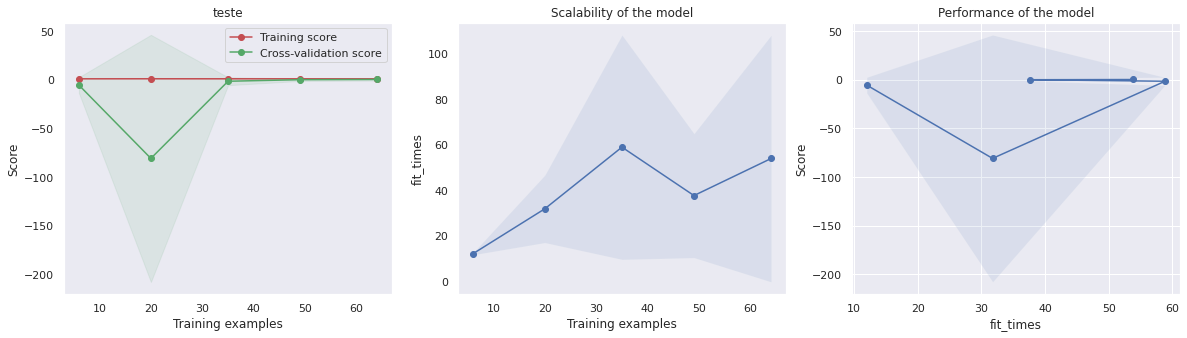

In [20]:
plot_learning_curve(estimator= pipe_mlp, title ='learning_curve', X=X,y=y,cv=10, n_jobs=-1)

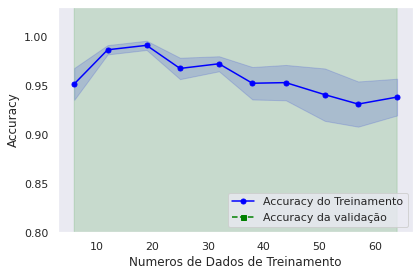

In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
                    learning_curve(estimator = pipe_mlp,
                         X=X,
                         y=y,
                         train_sizes=np.linspace(0.1,1.0,10),
                         cv=10, #fold
                         n_jobs=-1)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize =5,
         label='Accuracy do Treinamento')

plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15,
                 color = 'blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s',
         markersize=5, label='Accuracy da validação')
plt.fill_between(train_sizes, 
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15,
                 color = 'green')

plt.grid('-')
plt.xlabel('Numeros de Dados de Treinamento')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8,1.03])
plt.tight_layout()
plt.show();

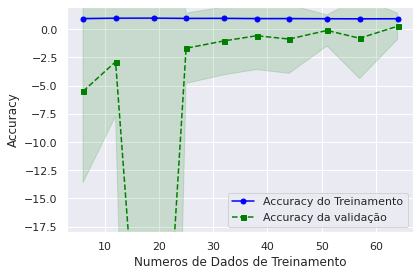

In [22]:
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize =5,
         label='Accuracy do Treinamento')

plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15,
                 color = 'blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s',
         markersize=5, label='Accuracy da validação')
plt.fill_between(train_sizes, 
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15,
                 color = 'green')

plt.grid('-')
plt.xlabel('Numeros de Dados de Treinamento')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([-18,2])
plt.tight_layout()
plt.show();

#fim